In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
df = pd.read_csv('24a46ea5.csv')

In [11]:
print(df.head())

                                                                                                                                     Table 1: Summary of gross domestic product statistics for selected countries and regions, 2021
NaN        Population³ Total GDP\n(pounds\nmillion)⁴ GDP per head \n(pounds)¹ ⁴ ⁶ Annual growth\nin \n‘real’ GDP 2020\n(percentage)⁵  Annual growth\nin \n‘real’ GDP 2021\n(percenta...                                            
UK         67,026,307  2,276,715                     33,745                       -11.0                                                                                             7.5                                            
NaN        NaN         NaN                           NaN                          NaN                                                                                               NaN                                            
England    56,536,419  1,961,238                     34,690                       -11.5 

In [12]:
df.describe()

,"Table 1: Summary of gross domestic product statistics for selected countries and regions, 2021"
count,16
unique,13
top,7.5
freq,2


In [15]:
print(df.columns)

Index(['Table 1: Summary of gross domestic product statistics for selected countries and regions, 2021'], dtype='object')


In [21]:
delimiter = ','  


df = pd.read_csv('24a46ea5.csv', delimiter=delimiter, skiprows=1)


print(df.head())


if len(df.columns) == 6:  
    df.columns = ['Region', 'Population', 'Total_GDP_Million', 'GDP_Per_Head', 'Annual_Growth_Real_GDP_2020', 'Annual_Growth_Real_GDP_2021']
else:
    print(f"Expected 6 columns, but found {len(df.columns)}")


   Unnamed: 0 Population³ Total GDP\n(pounds\nmillion)⁴  \
0          UK  67,026,307                     2,276,715   
1         NaN         NaN                           NaN   
2     England  56,536,419                     1,961,238   
3  North East   2,646,772                        65,045   
4  North West   7,422,294                       220,304   

  GDP per head \n(pounds)¹ ⁴ ⁶  \
0                       33,745   
1                          NaN   
2                       34,690   
3                       24,575   
4                       29,681   

   Annual growth\nin \n‘real’ GDP 2020\n(percentage)⁵  \
0                                              -11.0    
1                                                NaN    
2                                              -11.5    
3                                              -13.3    
4                                              -12.0    

   Annual growth\nin \n‘real’ GDP 2021\n(percentage)⁵  
0                                        

In [24]:

df['Population'] = pd.to_numeric(df['Population'].str.replace(',', ''), errors='coerce')
df['Total_GDP_Million_Pounds'] = pd.to_numeric(df['Total_GDP_Million_Pounds'].str.replace('£', '').str.replace(',', ''), errors='coerce')
df['GDP_Per_Head_Pounds'] = pd.to_numeric(df['GDP_Per_Head_Pounds'].str.replace('£', '').str.replace(',', ''), errors='coerce')


df['Annual_Growth_Real_GDP_2020_Percentage'] = pd.to_numeric(df['Annual_Growth_Real_GDP_2020_Percentage'], errors='coerce')
df['Annual_Growth_Real_GDP_2021_Percentage'] = pd.to_numeric(df['Annual_Growth_Real_GDP_2021_Percentage'], errors='coerce')


df.dropna(inplace=True) 


print(df.dtypes)
print(df.head())



Region                                     object
Population                                float64
Total_GDP_Million_Pounds                  float64
GDP_Per_Head_Pounds                       float64
Annual_Growth_Real_GDP_2020_Percentage    float64
Annual_Growth_Real_GDP_2021_Percentage    float64
dtype: object
                      Region  Population  Total_GDP_Million_Pounds  \
2                    England  56536419.0                 1961238.0   
3                 North East   2646772.0                   65045.0   
4                 North West   7422294.0                  220304.0   
5  Yorkshire and\nThe Humber   5481431.0                  151794.0   
6              East Midlands   4880094.0                  134228.0   

   GDP_Per_Head_Pounds  Annual_Growth_Real_GDP_2020_Percentage  \
2              34690.0                                   -11.5   
3              24575.0                                   -13.3   
4              29681.0                                   -12.0   
5

In [25]:
df.describe()

,Population,Total_GDP_Million_Pounds,GDP_Per_Head_Pounds,Annual_Growth_Real_GDP_2020_Percentage,Annual_Growth_Real_GDP_2021_Percentage
count,1.300000e+01,1.300000e+01,13.000000,13.000000,13.000000
mean,9.504825e+06,3.248503e+05,31659.923077,-11.638462,8.907692
std,1.429840e+07,5.073967e+05,9083.906313,0.705382,0.731963
min,1.904578e+06,5.171700e+04,24575.000000,-13.300000,7.500000
25%,4.880094e+06,1.342280e+05,27505.000000,-11.800000,8.500000
50%,5.712840e+06,1.691620e+05,29628.000000,-11.500000,9.000000
75%,7.422294e+06,2.203040e+05,30869.000000,-11.200000,9.400000
max,5.653642e+07,1.961238e+06,59855.000000,-10.600000,9.900000


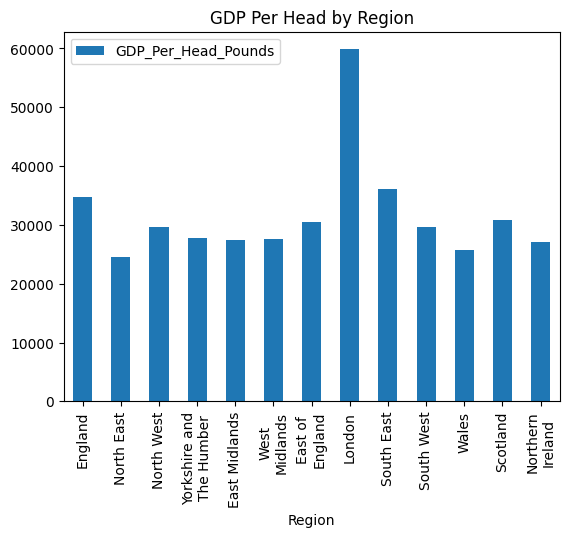

In [26]:
df.plot(kind='bar', x='Region', y='GDP_Per_Head_Pounds', title='GDP Per Head by Region')
plt.show()

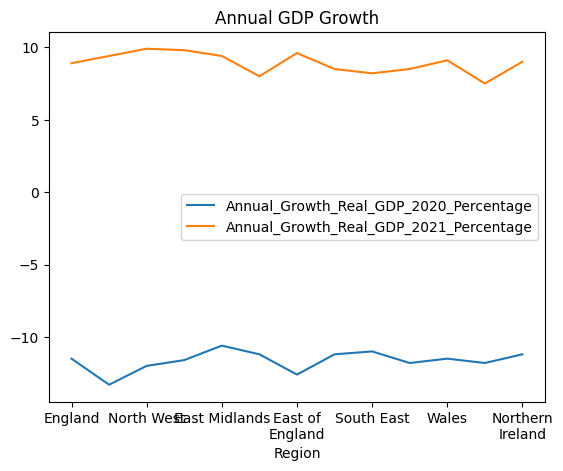

In [27]:
df.plot(kind='line', x='Region', y=['Annual_Growth_Real_GDP_2020_Percentage', 'Annual_Growth_Real_GDP_2021_Percentage'], title='Annual GDP Growth')
plt.show()

In [28]:
df.corr()

/tmp/ipykernel_72/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Population,Total_GDP_Million_Pounds,GDP_Per_Head_Pounds,Annual_Growth_Real_GDP_2020_Percentage,Annual_Growth_Real_GDP_2021_Percentage
Population,1.000000,0.990583,0.199576,0.097333,-0.039147
Total_GDP_Million_Pounds,0.990583,1.000000,0.328417,0.125727,-0.071396
GDP_Per_Head_Pounds,0.199576,0.328417,1.000000,0.269819,-0.282998
Annual_Growth_Real_GDP_2020_Percentage,0.097333,0.125727,0.269819,1.000000,-0.317339
Annual_Growth_Real_GDP_2021_Percentage,-0.039147,-0.071396,-0.282998,-0.317339,1.000000
